In [ ]:
!git clone https://github.com/siddhant230/DiffTimesNet.git

In [ ]:
%cd DiffTimesNet/
!git checkout dev-model-data

In [ ]:
!git branch

### start

# get all datasets and save

In [ ]:
!python get_data.py

# dependencies

In [ ]:
!pip install -q -r requirements.txt

## TASKS

### classification

In [ ]:
!chmod +x ./scripts/classification/TimesNet.sh
!./scripts/classification/TimesNet.sh

###long term forecast

In [ ]:
!chmod +x ./scripts/long_term_forecast/ETT_script/TimesNet_ETTh1.sh
!./scripts/long_term_forecast/ETT_script/TimesNet_ETTh1.sh

###short-term forecast

In [ ]:
!chmod +x ./scripts/short_term_forecast/TimesNet_M4.sh
!./scripts/short_term_forecast/TimesNet_M4.sh

###imputation

In [ ]:
!chmod +x ./scripts/imputation/ETT_script/TimesNet_ETTh1.sh
!./scripts/imputation/ETT_script/TimesNet_ETTh1.sh

###anomaly detection

In [ ]:
!chmod +x ./scripts/anomaly_detection/PSM/TimesNet.sh
!./scripts/anomaly_detection/PSM/TimesNet.sh

## visual

In [ ]:
import re
import pandas as pd
import os
from io import StringIO

def get_benchmark_df():
  data_string = """
  EthanolConcentration 32.3 43.7 45.2 32.3 39.9 31.1 28.9 32.7 31.9 31.6 30.8 31.6 32.7 31.2 28.1 33.8 32.6 29.7 35.7
  FaceDetection 52.9 63.3 64.7 57.7 65.7 66.7 52.8 67.3 68.6 67.0 65.7 68.4 68.0 66.0 66.3 67.6 68.0 67.5 68.6
  Handwriting 28.6 15.8 58.8 15.2 25.8 24.6 53.3 32.0 27.4 32.8 29.4 36.7 31.6 28.0 32.5 33.8 27.0 26.1 32.1
  Heartbeat 71.7 73.2 75.6 72.2 77.1 72.7 75.6 76.1 77.1 80.5 75.6 74.6 73.7 73.7 71.2 77.6 75.1 75.1 78.0
  JapaneseVowels 94.9 86.5 96.2 79.7 98.1 98.4 98.9 98.7 97.8 98.9 98.4 96.2 99.2 98.4 95.9 98.9 96.2 96.2 98.4
  PEMS-SF 71.1 98.3 75.1 39.9 86.7 86.1 68.8 82.1 82.7 81.5 83.2 82.7 87.3 80.9 86.0 83.8 75.1 88.4 89.6
  SelfRegulationSCP1 77.7 84.6 90.8 68.9 84.0 90.8 84.6 92.2 90.4 90.1 88.1 84.0 89.4 88.7 89.6 92.5 87.3 89.8 91.8
  SelfRegulationSCP2 53.9 48.9 53.3 46.6 52.8 52.2 55.6 53.9 56.7 53.3 53.3 50.6 57.2 54.4 55.0 56.1 50.5 51.1 57.2
  SpokenArabicDigits 96.3 69.6 71.2 31.9 100.0 100.0 95.6 98.4 97.0 100.0 99.6 100.0 100.0 100.0 100.0 98.8 81.4 100.0 99.0
  UWaveGestureLibrary 90.3 75.9 94.4 41.2 87.8 85.9 88.4 85.6 85.6 85.6 83.4 85.9 87.5 85.3 85.0 86.6 82.1 80.3 85.3
  Average_Accuracy 67.0 66.0 72.5 48.6 71.8 70.9 70.3 71.9 71.5 72.1 70.8 71.1 72.7 70.7 71.0 73.0 67.5 70.4 73.6
  """
  df = pd.read_csv(StringIO(data_string), delim_whitespace=True, header=None)
  df = df.reset_index(drop=True).iloc[:, [0, 19]]
  bench_df = pd.DataFrame()
  bench_df["Exp Name"] = df.iloc[:, 0]
  bench_df["acc-BENCHMARK"] = df.iloc[:, -1]
  return bench_df


def parser(text_file_paths, get_metadata=False):
  df = get_benchmark_df()
  for text_file_path in os.listdir(text_file_paths):
    if ".txt" not in text_file_path:
      continue
    text_file_path = os.path.join(text_file_paths, text_file_path)

    with open(text_file_path, "r") as f:
      text = f.read()

    setup_name = os.path.basename(text_file_path)
    
    data_splits = text.split("Args in experiment:")[1:]
    if len(data_splits) == 10:
      mds, names, accs = [], [], []
      for data in data_splits:
        metadata = str(re.search('(?<=Namespace)(.*)', data).groups()[0])
        name = str(re.search('(?<=model_id=)(.*),', data).groups()[0].split(",")[0])
        acc = str(re.search('(?<=accuracy:)(.*)', data).groups()[0]).replace("\n", "")
        names.append(name)
        accs.append(round(float(acc)*100.0, 2))
        mds.append(metadata)

      df["Exp Name"] = names + ["Average_Accuracy"]
      df[f"acc-{setup_name}"] = accs + [sum(accs)/len(accs)]
      if get_metadata:
        df[f"meta-{setup_name}"] = mds + [" "]
    else:
      print("Skipping : ", setup_name)
  return df
  

In [ ]:
parser("/content/drive/MyDrive/Timesnet_data/logs", get_metadata=False)

In [18]:
import pandas as pd

a = [400, 400, 400]
b = [30, 56, 23]
c = [20,6, 90]


df=pd.DataFrame()
df["name"] = ["yo", "mo", "no"]
df["a"] = a
df["b"] = b
df["c"] = c

df

,name,a,b,c
0,yo,400,30,20
1,mo,400,56,6
2,no,400,23,90


In [19]:
df

,name,a,b,c
0,yo,400,30,20
1,mo,400,56,6
2,no,400,23,90


<Axes: >

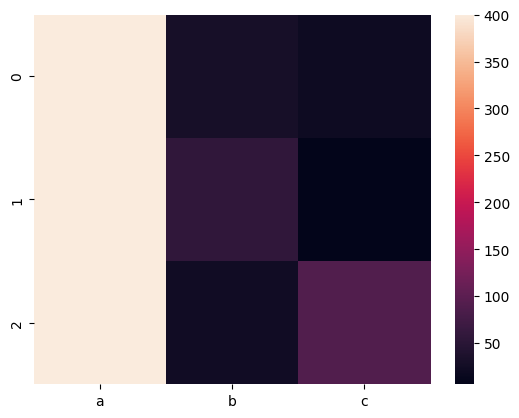

In [20]:
import seaborn as sns

sns.heatmap(df.iloc[:, 1:])